# Lecture 5: Linear Models - Regression

COMP 3921F \
Applied Machine Learning \
Mon 4:40 PM - 5:55 PM \
Tue: 5:00 PM - 6:15 PM

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Feb 5, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 2 is due on Feb 14  
2. Recitations will review __[Lecture 4](https://github.com/rameshnatarajanus/stern-comp3921f-spring2024/blob/main/notebooks/Lecture-04-Linear-Models-Perceptron.ipynb)__.
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.


# Learning Objectives

+ Define linear models and understand their specification
+ Understand the loss functions used for fitting linear models
+ Understand how to optimize the loss function over training data to estimate model parameters
+ Interpret the coefficients (parameters) in linear models
+ Apply linear models for prediction and decision making


# Linear Model 



<table>
    <td width="40%"><center>
        <img src="./img/Lecture-05/linear-regression-creative.png" />      
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>

Given a set of features $(x_0, x_1, \ldots, x_d) \in \cal{X}$, and observations $y \in \cal{Y}$ the linear model has the form **signal + noise**.

\begin{align*}
y & = f(x;\theta) + \epsilon,
\end{align*}
where $f(x:\theta)$  (the signal) is the linear model of the form
\begin{align*}
f(x;\theta) & = \theta_0 x_0 + \theta_1  x_1 + \theta_2  x_2 + ... + \theta_d  x_d.
\end{align*}
Here $x \in \mathbb{R}^{(d+1)}$ is a vector of features, $y$ is the target, $\epsilon$ is the noise (or resideual term), and $\theta_j$ are the *parameters* of the model.

Note that  $x_0 = 1$ and therefore the parameter $\theta_0$ corresponds to the intercept (or bias) term in the linear model.

We are given some training examples $\{x_0^{(i)}, x_1^{(i)}, \ldots, x_d^{(i)}, y^{(i)})_{i=1}^n$


</td></table> 


# Notation: Design Matrix


We can use matrix notation: $y, \epsilon \in \mathbb{R}^n,  X \in \mathbb{R}^{n \times (d+1)},  \theta \in \mathbb{R}^{(d+1)} $ of the form to write

\begin{align*}
y = X\theta + \epsilon,
\end{align*}
where 
\begin{align*}
y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}, \qquad
X = \begin{bmatrix}
x_0^{(1)} & \ldots & x_{d+1}^{(1)} \\
x_0^{(2)} & \ldots & x_{d+1}^{(2)} \\
\vdots  & \vdots & \vdots \\
x_0^{(n)} & \ldots & x_{d+1}^{(n)}\\
\end{bmatrix}, \qquad
\theta = \begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{d}
\end{bmatrix}, \qquad
\epsilon = \begin{bmatrix}
\epsilon^{(1)} \\
\epsilon^{(2)} \\
\vdots \\
\epsilon^{(n)}
\end{bmatrix}.
\end{align*}

Here $X$ is known as the design matrix, and is of size $n \times (d+1)$.

# Loss function: Mean Squared Error

We estimate the parameters $\theta$ to minimize the mean squared error (MSE) on the training data (with slight differences, this objective are also known as the residual sum of squares (RSS)), defined by

$${\cal{L}}(\theta)= \frac{1}{2n} \sum_{i=1}^n(\epsilon^{(i)})^2 = \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^T x^{(i)})^2$$

This can equivalently be written in matrix-vector form as:
$${\cal{L}}(\theta) = \frac{1}{2} \|\epsilon\|^2 = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

The estimated value $\hat{\theta}$ is then given by 

$$ \hat{\theta} = \arg\min_{\theta} {\cal{L}}(\theta),$$

and the correspond prediction for $y$ is given $\hat{y} = f(x;\hat{\theta})$.

**FACT**: The estimates $\hat{\theta}$ are unbiased, that is $E\left[\hat{\theta}\right] = \theta$, and have the smallest variance  $E\left[(\hat{\theta} - \theta)^2\right]$, of all linear estimators of $\theta$. This is the famous Gauss-Markov theorem.  However, despite this, there are biased estimators that may have a smaller M.S.E. which we will encounter when we study the need for regularization. 

# The Gradient of the Loss function

The parameter estimation will require the gradient of the loss function with respect to the parameters. 

In the case of the squared error loss function the gradients can be computed explicitly (review matrix differential calculus)

\begin{align*}
\nabla_\theta \cal{L}(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^T  (X \theta - y) \\
& = (X^T X) \theta - X^T y
\end{align*}



# Normal Equations


Setting the gradient of the loss function to zero, we obtain the *normal equations*:
$$ (X^T X) \theta = X^T y.$$

Hence, the value $\hat{\theta}$ that minimizes this objective is given by:
$$ \hat{\theta} = (X^T X)^{-1} X^T y.$$

Note that we assumed that the matrix $(X^T X)$ is invertible, that is $X$ is of full rank; if this is not the case, in the next lecture we will consider some waysto address this issue.

# Relationship between the Model and the Loss function

In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

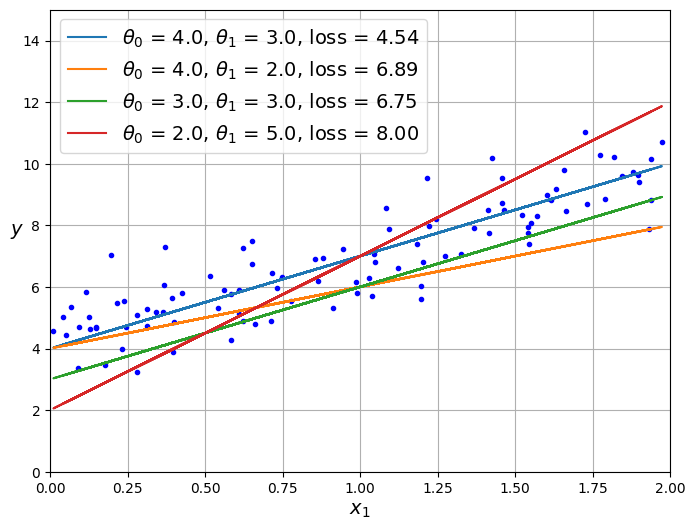

In [2]:


np.random.seed(42)  # to make this code example reproducible
nsamp = 100  # number of instances

# synthetic data with known theta
theta_true = (4.0, 3.0)
sig = 1.0
x_1 = 2 * np.random.rand(nsamp, 1)  # column vector
y = theta_true[0] + theta_true[1] * x_1 + sig*np.random.randn(nsamp,1 )  # column vector

plt.figure(figsize=(8, 6))
plt.plot(x_1, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

theta_trials = [theta_true, (4.0, 2.0), (3.0, 3.0), (2.0, 5.0)]
for theta_trial in theta_trials:
    plt.plot(x_1, theta_trial[0] + theta_trial[1] * x_1 , 
             label=rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}, loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}')
plt.legend()

plt.show()


# Dependence of the Loss Function on Model Coefficients

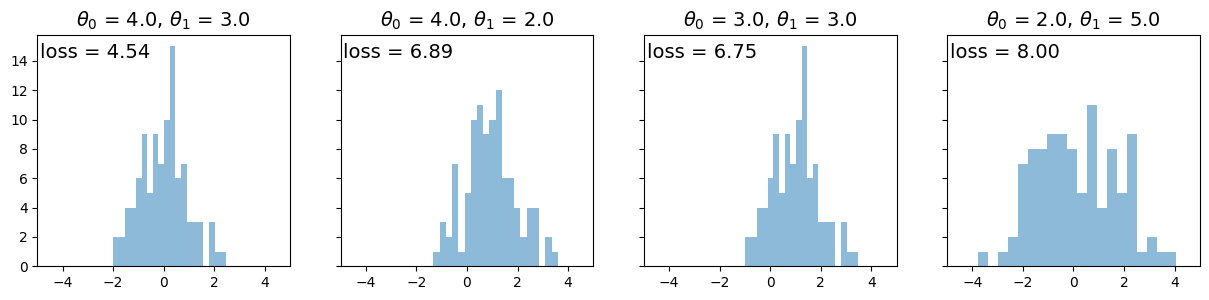

In [6]:
# plot the histogram of residuals for each line

fig, axes = plt.subplots(1,4, figsize=(15, 3), sharex=True, sharey=True)

for ax, theta_trial in zip(axes, theta_trials):
    ax.hist(y - (theta_trial[0]  + theta_trial[1] * x_1), alpha=.5, bins=20)
    ax.annotate(f'loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}', 
                xy = (2,150), xycoords='axes points')
    ax.set_xlim(-5*sig, 5*sig)
    ax.set_title(rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}')

# Sensitivity of the Loss Function to the noise level in the data

As can be seen from this interactive plot the loss function is quite inssensitive to the parameter values when the noise is large. 

Therefore recovering the signal from noisy observations is intrinsically hard and may require many more observations.

In [7]:
from ipywidgets import interact

nsamp = 100
print(f'nsamp: {nsamp}')

x_1 = 2 * np.random.rand(nsamp, 1)  # column vector

@interact
def plot_lines(sigs=(1, 10, 0.5)):
    y = theta_true[0] + theta_true[1] * x_1 + sigs*np.random.randn(nsamp,1 )  # column vector
    fig, axes = plt.subplots(1,4, figsize=(15, 3), sharex=True, sharey=True)
    for ax, theta_trial in zip(axes, theta_trials):
        ax.hist(y - (theta_trial[0]  + theta_trial[1] * x_1), alpha=.5, bins=20)
        ax.annotate(f'loss = {0.5*np.linalg.norm(y - (theta_trial[0]  + theta_trial[1] * x_1)):.2f}', 
                    xy = (2,150), xycoords='axes points')
        ax.set_xlim(-5*sigs, 5*sigs)
        ax.set_title(rf'${{\theta_0}}$ = {theta_trial[0]}, ${{\theta_1}}$ = {theta_trial[1]}')
    plt.show()    




nsamp: 100


interactive(children=(FloatSlider(value=5.0, description='sigs', max=10.0, min=1.0, step=0.5), Output()), _dom…

# Least Squares Model Estimation 

## Normal Equations method (numpy)

theta_hat: [[4.02514313 2.9481011 ]]
y_predict: [[4.02514313 9.92134534]]


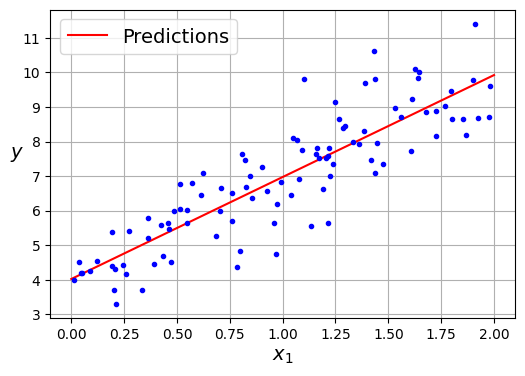

In [8]:
from sklearn.preprocessing import add_dummy_feature

nsamp = 100
sig = 1.0

x_1 = 2 * np.random.rand(nsamp, 1)  # column vector
y = theta_true[0] + theta_true[1] * x_1 + sig*np.random.randn(nsamp,1 )  # column vector

X_b = add_dummy_feature(x_1)  # add x0 = 1 to each instance

theta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(f"theta_hat: {theta_hat.T}")

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_hat

print(f"y_predict: {y_predict.T}")

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(x_1, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.legend(loc="upper left")

plt.show()

## LinReg in the Scikit library

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_b, y)
print(f"theta_hat: {lin_reg.coef_}")

print(f"prediction: {lin_reg.predict(X_new_b).T}")



theta_hat: [[4.02514313 2.9481011 ]]
prediction: [[4.02514313 9.92134534]]


## Singular Value Decomposition in Scikit library

In [49]:

theta_hat_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

print(f"theta_hat: {theta_hat_svd.T}")


theta_hat: [[3.88881791 3.01569281]]


### Pseudoinverse computation in Numpy library 

In [13]:
# This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

theta_hat_pinv = np.linalg.pinv(X_b) @ y

print(f"theta_hat: {theta_hat_pinv.T}")

theta_hat: [[4.02514313 2.9481011 ]]


# Other loss functions 

The Mean Squared Error loss function is quadratic in the parameters.  There are are many other loss functions that also lead to useful estimators for the model parameters.   


$$     {\cal{L}}_1 (\hat{\theta}) = | \hat{\theta} - \theta | \qquad \text{Median Regression} $$ 


$$    {\cal{L}}_2 (\hat{\theta}) =  \frac{1}{2}( \hat{\theta} - \theta)^2 \qquad \text{Least Squares Regression}   $$

$$   
    {\cal{L}}_{\delta} (\hat{\theta}) =
    \left\{\begin{matrix}
        \frac{1}{2}(\hat{\theta} - \theta)^{2} & if \left | ( \hat{\theta} - \theta)  \right | < \delta\\
        \delta (| \hat{\theta}  - \theta| - \frac1 2 \delta) & otherwise
    \end{matrix}\right.  \qquad \text{Robust Regression}  $$
    
Many loss functions are  either not differentiable, or their derivatives cannot be expressed in closed form.  For these loss functions, the model parameter estimation requires more general techniques (described below)

    
For plotting these loss functions, we will assume the "true parameters" $\theta = 0$ without loss of generality.


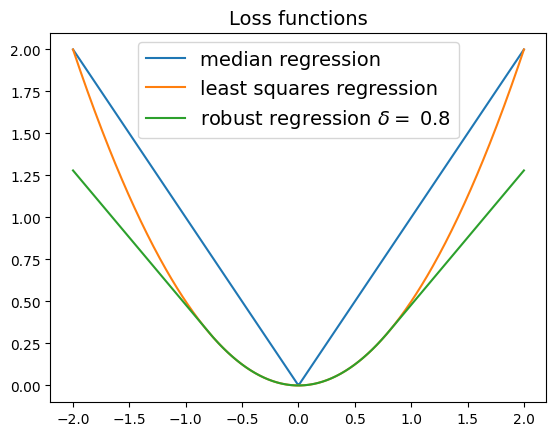

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 500)
delta = 0.8

plt.plot(x, np.abs(x -0) , label='median regression')
plt.plot(x, 0.5*(x - 0)**2 , label='least squares regression')
plt.plot(x, np.where(np.abs(x-0) < delta, 0.5*(x - 0)**2, delta*(np.abs(x-0) - 0.5*delta))  , label=f'robust regression $\delta =$ {delta}')
plt.legend()
plt.title("Loss functions")
plt.show()

# Model Training using Gradient Descent 


# Calculus Review: The Gradient

The gradient $\nabla_\theta {\cal{L}}$ where $ {\cal{L}} : \mathbb{R}^{(d+1)} \to \mathbb{R}$ is defined at a point $\theta$ as

$$ \nabla_\theta {\cal{L}} (\theta) = \begin{bmatrix}
\frac{\partial {\cal{L}}(\theta)}{\partial \theta_0},
\frac{\partial {\cal{L}}(\theta)}{\partial \theta_1},
\ldots,
\frac{\partial {\cal{L}}(\theta)}{\partial \theta_d}
\end{bmatrix}^T.$$

The $j$-th entry of the vector $\nabla_\theta {\cal{L}} (\theta)$ is the partial derivative $\frac{\partial \cal{L}(\theta)}{\partial \theta_j}$ of ${\cal{L}}$ with respect to the $j$-th component of $\theta$.

Let's look at the gradient vector for function of 2 variables

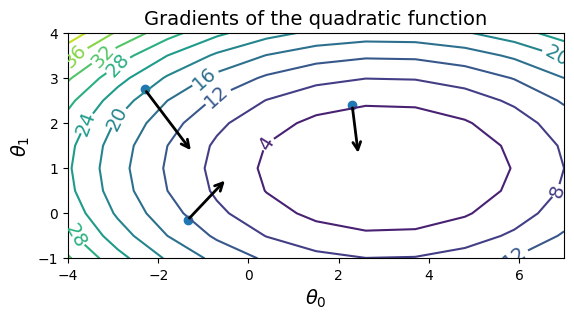

In [16]:
#  L(theta0, theta1) = 0.5*((2*theta1-2)**2 + (theta0-3)**2)

def quadratic_function2d(theta0, theta1):
    """Quadratic objective function, J(theta0, theta1).
    
    The inputs theta0, theta1 are 2d arrays and we evaluate
    the objective at each value theta0[i,j], theta1[i,j].
    We implement it this way so it's easier to plot the
    level curves of the function in 2d.

    Parameters:
    theta0 (np.array): 2d array of first parameter theta0
    theta1 (np.array): 2d array of second parameter theta1
    
    Returns:
    fvals (np.array): 2d array of objective function values
        fvals is the same dimension as theta0 and theta1.
        fvals[i,j] is the value at theta0[i,j] and theta1[i,j].
    """
    theta0 = np.atleast_2d(np.asarray(theta0))
    theta1 = np.atleast_2d(np.asarray(theta1))
    func = 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    return func

def quadratic_derivative2d(theta0_pts, theta1_pts):
    """Derivative of quadratic objective function.
    
    The inputs theta0, theta1 are 1d arrays and we evaluate
    the derivative at each value theta0[i], theta1[i].

    Parameters:
    theta0 (np.array): 1d array of first parameter theta0
    theta1 (np.array): 1d array of second parameter theta1
    
    Returns:
    grads (np.array): 2d array of partial derivatives
        grads is of the same size as theta0 and theta1
        along first dimension and of size
        two along the second dimension.
        grads[i,j] is the j-th partial derivative 
        at input theta0[i], theta1[i].
    """

    # this is the gradient of 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    grads = np.stack([theta0_pts-3, (2*theta1_pts-2)*2], axis=1)
    grads = grads.reshape([len(theta0_pts), 2])
    return grads


theta0_grid = np.linspace(-4.0,7.0,11)
theta1_grid = np.linspace(-1.0,4.0,11)
theta_grid = theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis]

f = quadratic_function2d(theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)

contours = plt.contour(X, Y, f, 10)
plt.clabel(contours)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Gradients of the quadratic function')
plt.axis('scaled')
plt.ylim(-1,4)

theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
g = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

for theta0_pt, theta1_pt, g_pt in zip(theta0_pts, theta1_pts, g):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*g_pt[0], theta1_pt-line_length*g_pt[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.show()

# Gradient Descent Learning: Notation

To find $\arg\min_{\theta} {\cal{L}}(\theta)$ by gradient descent, we start with an initial guess $\theta^{(0)}$ for the parameters and updating as follows until convergence :

$$\theta^{(i)} := \theta^{(i-1)} - \eta \cdot \nabla_\theta {\cal{L}}(\theta^{(i-1)}). $$  

Here $\eta$ is the step size, sometimes also called the learning rate.  Sometimes the learning rate may be adjusted as the iteration proceeds by specifying a learning rate schedule.  

One way to ascertain convergence is when $\theta^{(i)}$ is no longer changing, that is $||\theta^{(i)} - \theta^{(i-1)}|| < \delta$ for some small $\delta$.



In [7]:
from sklearn.preprocessing import add_dummy_feature

nsamp = 100
sig = 1.0

# synthetic data with known theta
theta_true = (4.0, 3.0)
sig = 1.0
x_1 = 2 * np.random.rand(nsamp, 1)  # column vector
y = theta_true[0] + theta_true[1] * x_1 + sig*np.random.randn(nsamp,1 )  # column vector

X_b = add_dummy_feature(x_1)  # add x0 = 1 to each instance


## Batch Gradient Descent

In [16]:
eta = 0.1  # learning rate
n_epochs = 1000
nsamp = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters
theta_path_bgd = []

for epoch in range(n_epochs):
    gradients = 2.0 / nsamp * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

theta

array([[4.11640953],
       [2.90636068]])

## Stochastic Gradient Descent

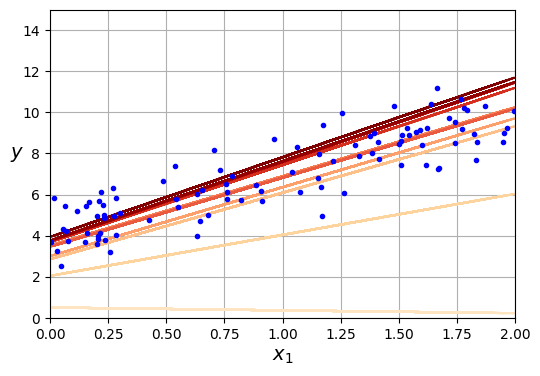

In [34]:
import matplotlib as mpl

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

m = len(X_b)

n_shown = 10  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

theta_path_sgd = []
for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(x_1, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  

plt.plot(x_1, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

## Mini-batch gradient descent

In [18]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(f"theta_hat: {theta.T}")

theta_hat: [[4.13695687 2.90599497]]


# Plot the convergence of BGD, SGD and MGD

In [24]:
theta_path_bgd.shape

(1000, 2, 1)

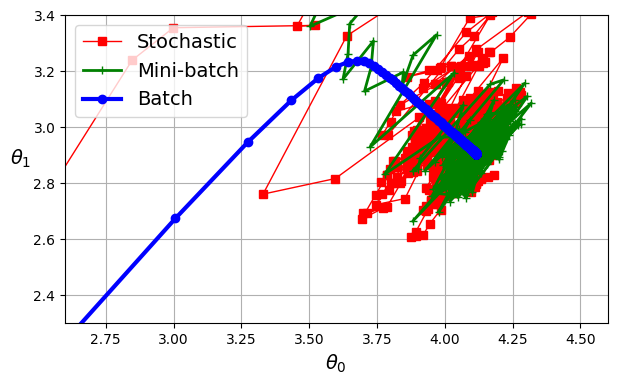

In [35]:
theta_path_bgd = np.squeeze(np.array(theta_path_bgd))
theta_path_sgd = np.squeeze(np.array(theta_path_sgd))
theta_path_mgd = np.squeeze(np.array(theta_path_mgd))

theta_path_sgd[:,1].shape
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

## Stochastic Gradient Descent from Scikit 

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(fit_intercept=False, max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X_b, y.ravel())  # y.ravel() because fit() expects 1D targets

sgd_reg.intercept_, sgd_reg.coef_

(array([0.]), array([4.02420106, 2.94846016]))

# Summary

Linear models are widely used in various domains for the following reasons:

+ Interpretability: Easy to understand the relationship between features and target variables.
+ Efficiency: Computationally efficient to train and predict.
+ Versatility: Applicable to various tasks with diverse data types.

This module contained an introduction to gradient descent, particularly stochastic gradient descent (SGD) which is widely used for computational efficiency in large datasets.

Some of the applications in which linear models are used include:

+ Finance: Predicting stock prices, creditworthiness assessment
+ Healthcare: Analyzing medical data, predicting disease risk
+ Marketing: Customer segmentation, targeted advertising
+Natural Language Processing: Sentiment analysis, topic modeling


Although linear models are well-understood and should be the first choice for any modeling procedure, you should be aware of some of the challenges, which include:

+ Multicollinearity 
+ Feature and Model Selection
+ Feature acquisition cost